MERRA-2

https://disc.gsfc.nasa.gov/datasets/M2T1NXLND_5.12.4/summary

https://search.earthdata.nasa.gov/search/granules?p=C1276812861-GES_DISC&q=M2T1NXLND&polygon[0]=20.53125%2C70.48752%2C12.44531%2C66.76036%2C8.78906%2C59.93897%2C13.42969%2C54.17243%2C17.36719%2C55.43826%2C22.5%2C61.90803%2C24.60938%2C67.95587%2C20.53125%2C70.48752&tl=1696359906!3!!&lat=60.53979784701664&long=-11.6015625&zoom=3

In [2]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr
import cartopy

In [8]:
file_path = r"C:\Users\trygg\Documents\Master_project\Data\MERRA_2\MERRA2_400.tavg1_2d_lnd_Nx.20230201.nc4"
ds = xr.open_dataset(file_path)
ds['SNODP'][0]
# Access a variable
# variable_data = ds['variable_name']

# # Access dimensions
dimensions = ds.dims

# # Access attributes
attributes = ds.attrs

print(dimensions), print(attributes)
# # Close the NetCDF4 file
ds.close()


Frozen({'lon': 576, 'lat': 361, 'time': 24})
{'History': 'Original file generated: Sun Feb 12 01:01:41 2023 GMT', 'Comment': 'GMAO filename: d5124_m2_jan10.tavg1_2d_lnd_Nx.20230201.nc4', 'Filename': 'MERRA2_400.tavg1_2d_lnd_Nx.20230201.nc4', 'Conventions': 'CF-1', 'Institution': 'NASA Global Modeling and Assimilation Office', 'References': 'http://gmao.gsfc.nasa.gov', 'Format': 'NetCDF-4/HDF-5', 'SpatialCoverage': 'global', 'VersionID': '5.12.4', 'TemporalRange': '1980-01-01 -> 2016-12-31', 'identifier_product_doi_authority': 'http://dx.doi.org/', 'ShortName': 'M2T1NXLND', 'GranuleID': 'MERRA2_400.tavg1_2d_lnd_Nx.20230201.nc4', 'ProductionDateTime': 'Original file generated: Sun Feb 12 01:01:41 2023 GMT', 'LongName': 'MERRA2 tavg1_2d_lnd_Nx: 2d,1-Hourly,Time-Averaged,Single-Level,Assimilation,Land Surface Diagnostics', 'Title': 'MERRA2 tavg1_2d_lnd_Nx: 2d,1-Hourly,Time-Averaged,Single-Level,Assimilation,Land Surface Diagnostics', 'SouthernmostLatitude': '-90.0', 'NorthernmostLatitude':

In [4]:
ds

<xarray.Dataset>
Dimensions:      (lon: 576, lat: 361, time: 24)
Coordinates:
  * lon          (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat          (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * time         (time) datetime64[ns] 2023-02-01T00:30:00 ... 2023-02-01T23:...
Data variables: (12/50)
    BASEFLOW     (time, lat, lon) float32 ...
    ECHANGE      (time, lat, lon) float32 ...
    EVLAND       (time, lat, lon) float32 ...
    EVPINTR      (time, lat, lon) float32 ...
    EVPSBLN      (time, lat, lon) float32 ...
    EVPSOIL      (time, lat, lon) float32 ...
    ...           ...
    TSOIL6       (time, lat, lon) float32 ...
    TSURF        (time, lat, lon) float32 ...
    TUNST        (time, lat, lon) float32 ...
    TWLAND       (time, lat, lon) float32 ...
    TWLT         (time, lat, lon) float32 ...
    WCHANGE      (time, lat, lon) float32 ...
Attributes: (12/30)
    History:                           Original file generated: Sun Feb 12 01...
    Comment:                           GMAO filename: d5124_m2_jan10.tavg1_2d...
    Filename:                          MERRA2_400.tavg1_2d_lnd_Nx.20230201.nc4
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    Contact:                           http://gmao.gsfc.nasa.gov
    identifier_product_doi:            10.5067/RKPHT8KC1Y1T
    RangeBeginningDate:                2023-02-01
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   2023-02-01
    RangeEndingTime:                   23:59:59.000000

In [5]:
latitude_bounds = slice(54, 70)
longitude_bounds = slice(10, 25)  # Note: Longitudes can be specified in the range -180 to 180 or 0 to 360

# Use .sel() to select the region based on the latitude and longitude bounds
subset = ds.sel(lat=latitude_bounds, lon=longitude_bounds)

# Now 'subset' contains the data for the specified geographical extent
ds.close()

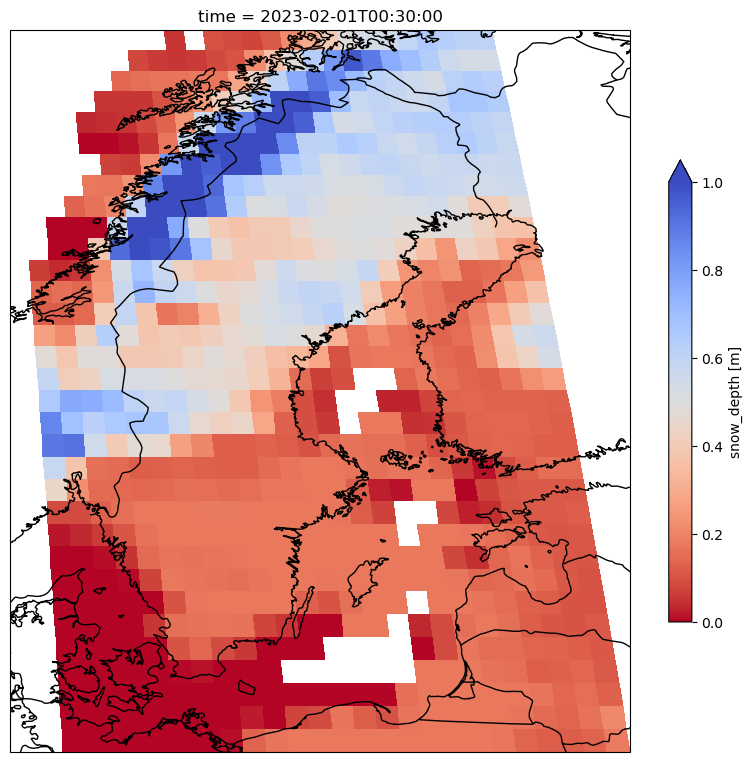

: 

In [11]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Robinson())

ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=1)
ax.coastlines(resolution="10m")

# Access the snow depth data for the specified index
plot = subset['SNODP'][0].plot(cmap=plt.cm.coolwarm_r, transform=ccrs.PlateCarree(), cbar_kwargs={"shrink": 0.6},vmin=0, vmax=1)